In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\PRAJWAL PANDIT\AppData\Local\Temp\ipykernel_2416\2194379965.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [16]:
data.reset_index(inplace=True)

In [17]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323097,91.207837,89.478122,90.661084,48485500


In [18]:
ma_100_days = data.Close.rolling(100).mean()

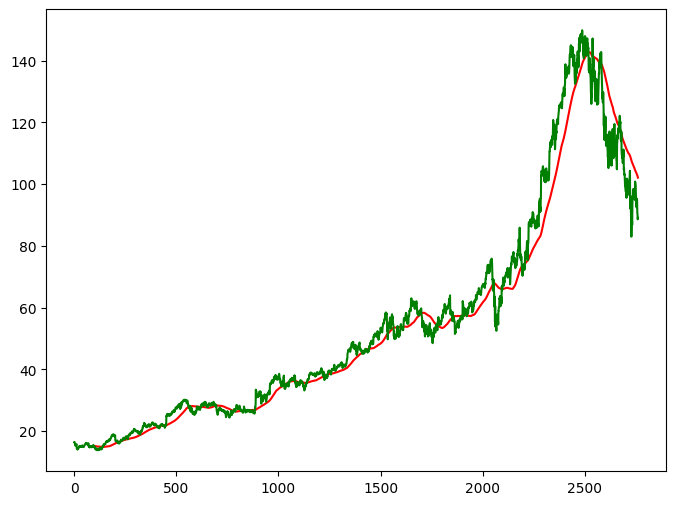

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [20]:
ma_200_days = data.Close.rolling(200).mean()

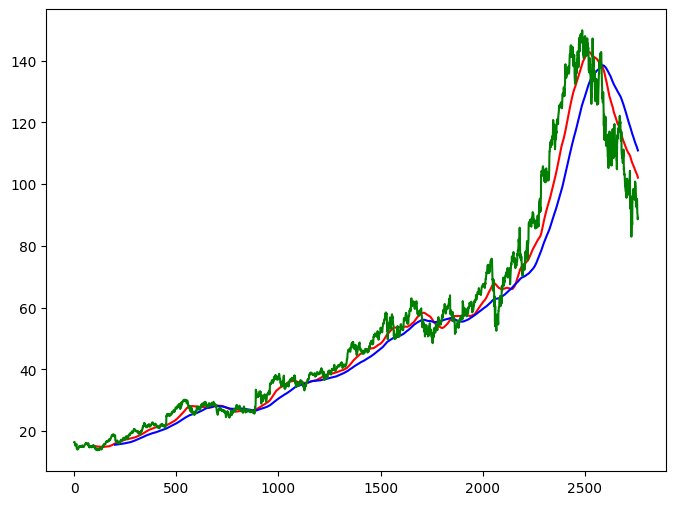

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [22]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [24]:
data_train.shape[0]

2208

In [25]:
data_test.shape[0]

553

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [29]:
x, y = np.array(x), np.array(y)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\PRAJWAL PANDIT\Desktop\Stock_Market_Prediction_ML\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 296ms/step - loss: 0.0275
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - loss: 0.0061
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - loss: 0.0049
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - loss: 0.0045
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0040
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - loss: 0.0038
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - loss: 0.0042
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - loss: 0.0035
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - loss: 0.0034
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - loss: 0.0029
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [35]:
pas_100_days = data_train.tail(100)

In [36]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [37]:
data_test_scale  =  scaler.fit_transform(data_test)

In [38]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step


In [40]:
scale =1/scaler.scale_

In [41]:
y_predict = y_predict*scale

In [42]:
y = y*scale

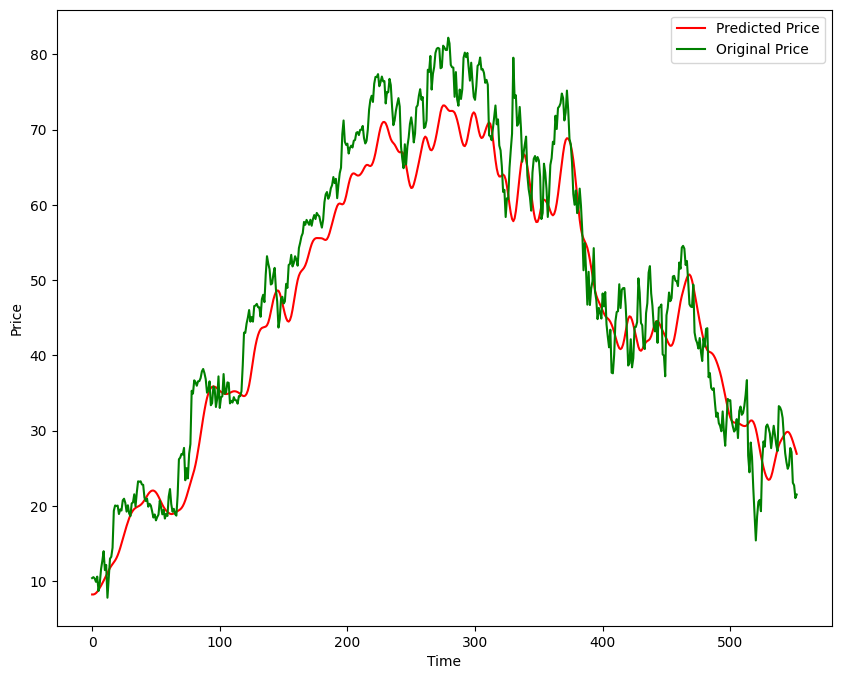

In [43]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

: 